# 1. INTRODUCTION
Welcome to the Jupyter Notebook on **Automated Data Processing with Python**. In this notebook, I will walk through the creation of a Python script designed to automate data processing tasks on various datasets. This includes calculating summary statistics, filtering data, generating visualizations, and saving the processed results. This script that can be adapted to different datasets but for demonstration purposes, we will use a dataset related to sales. 

# 2. IMPORT LIBRARIES

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
%matplotlib inline
sns.set(style="whitegrid")

# 3. DATASET SELECTION
I will start by loading the SalesData csv file using the pandas function *read_csv* and examining a dataset.

In [52]:
# load the dataset
def load_data(file_path):
    try:
        df = pd.read_csv(file_path, index_col=0)
        print(f"Data loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")
        return df
    
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please check the file path and try again.")
    
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{file_path}' is empty. Please provide a valid file with data.")
    
    except pd.errors.ParserError:
        print(f"Error: The file '{file_path}' could not be parsed. Please check the file format and ensure it is a valid CSV file.")
    
    except Exception as e:
        print(f"An unexpected error occurred while loading the file: {e}")

    return None


In [54]:
# Display the first few rows of the dataset
file_path = 'SalesData.csv'
original_df = load_data(file_path)
original_df.head()

Data loaded successfully with 185950 rows and 10 columns.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# 4. DATA PREPARATION AND CLEANING
In this section, I will prepare and clean the dataset to ensure it's in the best possible shape for analysis. This step is crucial for obtaining accurate and reliable insights from the data
### - Create a Copy of the Data:
This ensures that the original dataset remains unaltered
### - Remove Duplicate Entries:
Removing duplicates helps in ensuring that each record is unique and contributes accurately to the analysis.
### - Handle Missing Values:
Fill in missing values in the dataset. For numeric columns, I will use the mean of the column. For categorical columns, I will use the mode (most frequent value).
### - Convert Date Columns to Datetime Format:
Convert columns with 'Date' in their names to the datetime format to allows for accurate sorting, filtering, and analysis based on time.

In [56]:
def prepare_data(df):
    # Create a copy of the original DataFrame to work with
    df_copy = df.copy()

    # Replace infinite values with NaN
    df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Remove duplicates
    df_copy.drop_duplicates(inplace=True)
    
    # Drop rows with NaN values
    df_copy.dropna(inplace=True)

    # Fill in missing values
    for column in df_copy.columns:
        if df_copy[column].dtype == 'object':
            # Fill missing values in categorical columns with mode
            df_copy[column].fillna(df_copy[column].mode()[0])
        else:
            # Fill missing values in numeric columns with mean
            df_copy[column].fillna(df_copy[column].mean())

    # Convert any column with 'Date' in its name to datetime format
    for column in df_copy.columns:
        if 'date' in column.lower():
            df_copy[column] = pd.to_datetime(df_copy[column], errors='coerce')

    print(f"Data cleaning completed: {df.shape[0] - df_copy.shape[0]} duplicates removed, missing values filled, and date columns converted.")
    
    return df_copy


In [58]:
cleaned_df = prepare_data(original_df)
cleaned_df.head()

Data cleaning completed: 264 duplicates removed, missing values filled, and date columns converted.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# 5. CALCULATING SUMMARY STATISTICS
Next is to calculate some basic summary statistics, such as mean, median, and standard deviation, using pandas method *describe()*.

In [60]:
def calculate_summary_statistics(df):
    summary = df.describe()
    print("Summary Statistics:\n")
    return summary

In [62]:
# Calculate summary statistics for the dataset
summary_statistics = calculate_summary_statistics(cleaned_df)
summary_statistics

Summary Statistics:



,Order ID,Quantity Ordered,Price Each,Order Date,Month,Sales,Hour
count,185686.000000,185686.000000,185686.000000,185686,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255,2019-07-18 21:32:06.298051328,7.058653,185.611936,14.412934
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000
25%,185833.250000,1.000000,11.950000,2019-04-16 20:55:15,4.000000,11.950000,11.000000
50%,230354.500000,1.000000,14.950000,2019-07-17 20:11:00,7.000000,14.950000,15.000000
75%,275028.750000,1.000000,150.000000,2019-10-26 08:00:00,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000
std,51511.717183,0.443069,332.843838,NaN,3.502932,333.032118,5.423329


# 6. DATA FILTERING
Now, I will introduce the functioality to filter the dataset based on specific criteria. For instance, we might want to filter the data for a specific region.

In [77]:
def filter_data(df, column, value):
    if column not in df.columns:
        print(f"Error: Column '{column}' not found in the DataFrame")
        return pd.DataFrame
    
    df[column] = df[column].astype(str).str.strip()
    
    filtered_df = df[df[column] == value]
    
    if filtered_df.empty:
        print(f"No data found for {column} = {value}.")
    else:
        print(f"Filtered Data by {column} = {value}:\n")
        
    return filtered_df

In [79]:
#Filter the data for a specific month
filtered_df = filter_data(cleaned_df, 'Month', "12")
filtered_df

Filtered Data by Month = 12:



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
15905,293993,AAA Batteries (4-pack),1,2.99,2019-12-01 00:41:00,"999 10th St, San Francisco, CA 94016",12,2.99,San Francisco,0
16010,294093,USB-C Charging Cable,1,11.95,2019-12-01 00:37:00,"51 Cherry St, New York City, NY 10001",12,11.95,New York City,0
16375,294441,Wired Headphones,1,11.99,2019-12-01 00:52:00,"469 Sunset St, San Francisco, CA 94016",12,11.99,San Francisco,0
16572,294629,Wired Headphones,1,11.99,2019-12-01 01:54:00,"668 Ridge St, San Francisco, CA 94016",12,11.99,San Francisco,1


# 7. GENERATING DATA VISUALIZATIONS
I will now use Seaborn for visualizations, as it offers more aesthetically pleasing and complex visualizations compared to standard plotting methods. However, I'll also continue using Matplotlib for its additional flexibility and customization options.

### 7.1 Histogram
A graphical representation of the distribution of numerical data. It shows the frequency of data points within specified ranges (bins).

In [81]:
def plot_histogram(df, column):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True, bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

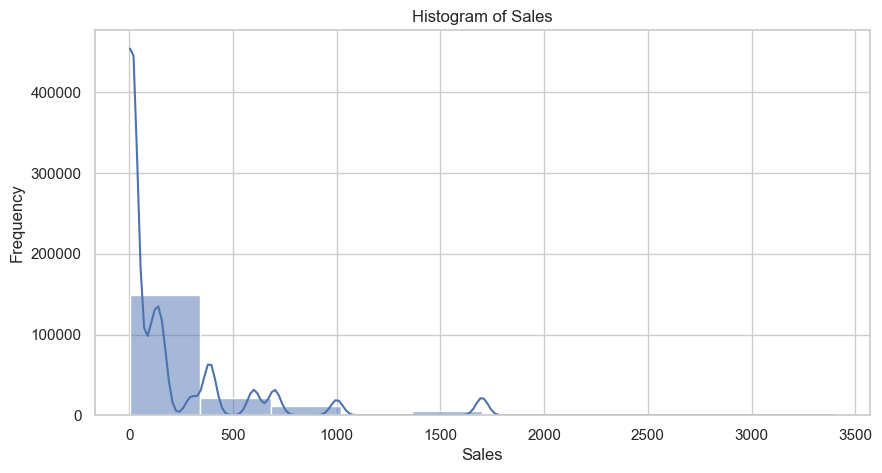

In [83]:
#A histogram plot for the 'Sales' column to show the distribution of sales values across all transactions in the dataset. 
#This visualization helps us understand the frequency of different sales amounts.
plot_histogram(cleaned_df, 'Sales')

### 7.2 Bar Chart
A bar chart is used to display and compare the total values of different categories. It shows the sum (or other aggregate function) of the numerical values for each category in the specified column.

In [85]:
def plot_bar_chart(df, category_col, value_col):
    plt.figure(figsize=(10, 4))
    sns.barplot(x=category_col, y=value_col, data=df, estimator=sum, errorbar=None, hue=category_col, palette='viridis', legend=False)
    plt.title(f'Total {value_col} by {category_col}')
    plt.xlabel(category_col)
    plt.ylabel(f'Total {value_col}')
    plt.xticks(rotation=90)  # Rotate the x labels for better readability
    plt.show()

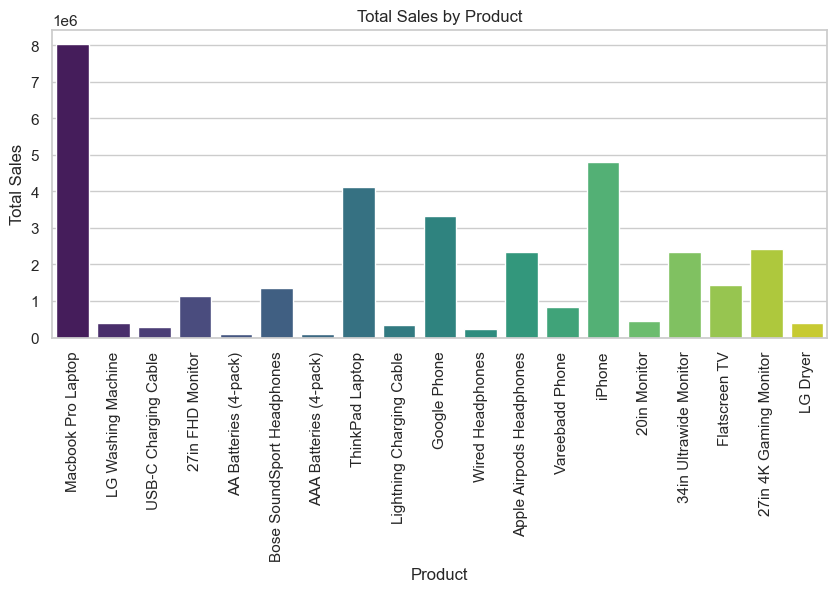

In [87]:
# A bar chart for 'Product' vs. 'Sales' to showcases the total sales for each product. 
#By summing the sales amounts, we can easily see which products are the top performers and which are lagging.
plot_bar_chart(cleaned_df, 'Product', 'Sales')

### 7.3 Pie Chart
A pie chart is useful to show the proportion of different categories within a column.

In [89]:
def plot_pie_chart(df, category_col, value_col, explode_index=0):
    aggregated_data = df.groupby(category_col)[value_col].sum()
    
    # Create an explode array where one slice is popped out
    explode = [0] * len(aggregated_data)
    explode[explode_index] = 0.1
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(aggregated_data, labels=aggregated_data.index, autopct='%1.1f%%', 
            colors=sns.color_palette('pastel'), explode=explode)
    plt.title(f'{value_col} Distribution by {category_col}')
    plt.show()

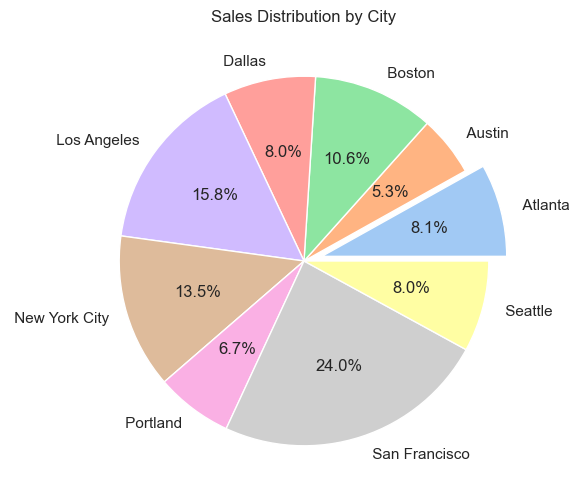

In [91]:
# The pie chart plot illustrates the distribution of total sales across different cities
plot_pie_chart(cleaned_df, 'City', 'Sales')

### 7.4 Scatter Plot
A scatter plot helps to visualize the relationship between two numerical variables

In [93]:
def plot_scatter(df, x_col, y_col, hue_col=None):
    plt.figure(figsize=(10, 4))
    if hue_col:
        sns.scatterplot(x=x_col, y=y_col, hue=hue_col, data=df)
    else:
        sns.scatterplot(x=x_col, y=y_col, data=df)
    plt.title(f'{y_col} vs. {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    if hue_col:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

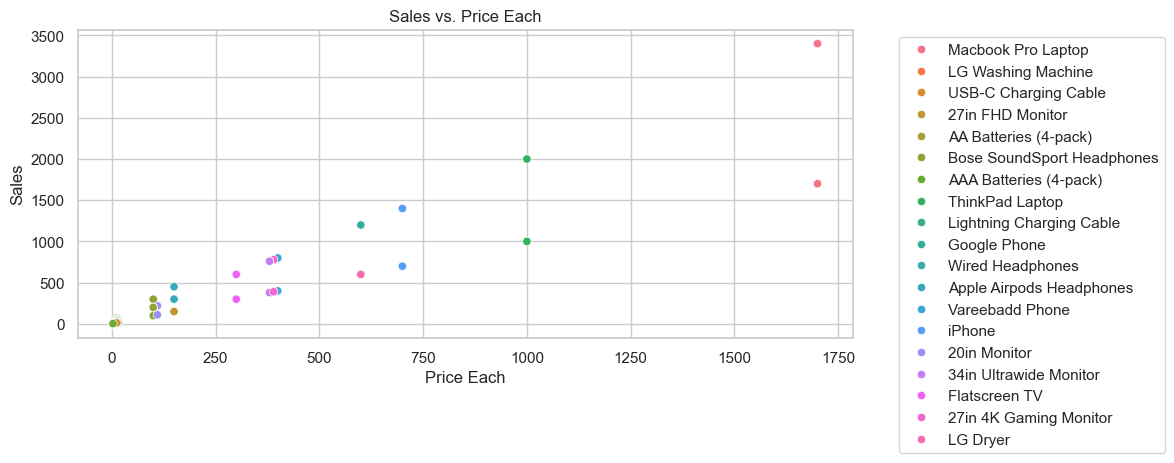

In [95]:
# The scatter plot depicts the relationship between price for each item and sales.
plot_scatter(cleaned_df,'Price Each', 'Sales', 'Product')

# 8. SAVING PROCESSED DATA
Fuction that saves the processed data to new CSV file

In [96]:
def save_processed_data(df, output_path):
    df.to_csv(output_path, index=False)
    print(f"Processed data saved to {output_path}")

In [97]:
# Save the processed data to a new file
output_path = 'filtered_sales_data.csv'
save_processed_data(cleaned_df, output_path)

Processed data saved to filtered_sales_data.csv


# 9. MAIN FUNCTION
The main function ties everything together

In [ ]:
def main():
    parser = argparse.ArgumentParser(description="Process and analyze sales data.")
    parser.add_argument('file_path', type=str, help="Path to the input CSV file")
    parser.add_argument('output_path', type=str, help="Path to save the processed CSV file")
    
   #Add arguments for interactive functions
    parser.add_argument('--filter_column', type=str, help="Column to filter on")
    parser.add_argument('--filter_value', type=str, help="Value to filter by")
    
    parser.add_argument('--histogram_col', type=str, help="Column for histogram")
    parser.add_argument('--bar_category_col', type=str, help="Category column for bar chart")
    parser.add_argument('--bar_value_col', type=str, help="Value column for bar chart")
    
    parser.add_argument('--pie_category_col', type=str, help="Category column for pie chart")
    parser.add_argument('--pie_value_col', type=str, help="Value column for pie chart")
    parser.add_argument('--pie_explode_index', type=int, default=0, help="Index of pie slice to explode")
    
    parser.add_argument('--scatter_x_col', type=str, help="X-axis column for scatter plot")
    parser.add_argument('--scatter_y_col', type=str, help="Y-axis column for scatter plot")
    parser.add_argument('--scatter_hue_col', type=str, help="Hue column for scatter plot")
    
    args = parser.parse_args()
    
    original_df = load_data(args.file_path)
    if original_df is None:
        return

    # Prepare data for analysis
    cleaned_df = prepare_data(original_df)    
    
    # Summary statistics
    summary = calculate_summary_statistics(cleaned_df)
    print(summary)

    # Data filtering
    if args.filter_column and args.filter_value:
        filtered_df = filter_data(cleaned_df, args.filter_column, args.filter_value)
        # Save the filtered data
        save_processed_data(filtered_df, args.output_path)
    else:
        save_processed_data(cleaned_df, args.output_path)
    
    # Visualizations
    if args.histogram_col:
        plot_histogram(cleaned_df, args.histogram_col)
    if args.bar_category_col and args.bar_value_col:
        plot_bar_chart(cleaned_df, args.bar_category_col, args.bar_value_col)
    if args.pie_category_col and args.pie_value_col:
        plot_pie_chart(cleaned_df, args.pie_category_col, args.pie_value_col, args.pie_explode_index)
    if args.scatter_x_col and args.scatter_y_col:
        plot_scatter(cleaned_df, args.scatter_x_col, args.scatter_y_col, args.scatter_hue_col)

if __name__ == "__main__":
    main()

# 10. DOCUMENTATIOM
Here’s a brief document outline:
## Overview
This script reads a dataset (in CSV format), processes the data, performs operations such as cleaning the data,calculating summary statistics, filtering data, generating visualizations, and saving the processed data to a new file.

## Dependencies
- pandas
- numpy
- matplotlib
- seaborn

Install these dependencies via PIP:
```pip install pandas numpy matplotlib seaborn```

## Usage

1. Place your dataset CSV file in the same directory as the script.
2. Modify the `file_path` and `output_path` in the script to match your dataset and desired output file name.
3. Run the script from the command line and specify the arguments. For example:

    ```bash
    python data_processing.py input_file.csv output_file.csv
    ```


    Or you can run the script with optional arguments which cover a more in depth analysis with this command:

    ```bash
    python data_processing.py input_file.csv output_file.csv --filter_column Month --filter_value 4 --histogram_col Sales --bar_category_col Product --bar_value_col Sales --pie_category_col City --pie_value_col Sales --scatter_x_col Price Each --scatter_y_col Sales --scatter_hue_col Product
    ```

    This command will:
    - Load `input_file.csv`.
    - Filter data where the `Month` column has a value of `4`.
    - Plot a histogram of the `Sales` column.
    - Create a bar chart of `Sales` by `Product`.
    - Generate a pie chart of `Sales` by `City`.
    - Create a scatter plot of `Sales` vs `Price Each` 
  
   ### Argumets
   - `file_path`: Path to the input CSV file.
   - `output_path`: Path to save the processed CSV file.
   - `--filter_column`: Column to filter on Month
   - `--filter_value`: Value to filter by 4
   - `--histogram_col`: Column for histogram
   - `--bar_category_col`: Category column for bar chart
   - `--bar_value_col`: Value column for bar chart
   - `--pie_category_col`: Category column for pie chart.
   - `--pie_value_col`: Value column for pie chart.
   - `--pie_explode_index`: Index of pie slice to explode (defaut: 0).
   - `--scatter_x_col`: X-axis column for scatter plot.
   - `--scatter_y_col`: Y-axis column for scatter plot.
   - `--scatter_hue_col`: Hue column for scatter plot.

Feel free to customize the arguments based on the needs of your dataset and analysis.
## Functions
- **`load_data(file_path)`**: Loads the dataset from the provided file path.
- **`prepare_data(original_df)`**: Cleans and prepares data for analysis.
- **`calculate_summary_statistics(df)`**: Computes summary statistics.
- **`filter_data(df, column, value)`**: Filters the data based on specific criteria.
- **`plot_histogram(df, column)`**: Plots a histogram for a specified column.
- **`plot_bar_chart(df, category_col, value_col)`**: Creates a bar chart of the specified category and value column.
- **`plot_scatter(df, x_col, y_col)`**: Creates a scatter plot to show the relationship between two numerical values.
- **`plot_pie_chart(df, category_col, value_col, explode_index=0)`**: Creates a pie chart.
- **`save_processed_data(df, output_path)`**: Saves the processed data to a new CSV file.
## Automation
The script is adapted to handle different datasets by changing the file input path.